In [1]:
import silq
silq.initialize("EWJN", mode='analysis')
%matplotlib notebook

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


In [37]:
class T1_Measurement_Set:
    def __init__(self, T1_msmts):
        self.T1_msmts = {T1_msmt.B0: T1_msmt for T1_msmt in T1_msmts}
        
    def calculate_values(self):
        self.B0_fields = np.array(list(self.T1_msmts.keys()))
        self.idx_sorted = np.argsort(self.B0_fields)
        self.B0_fields = self.B0_fields[self.idx_sorted]
        self.T1_values = np.array([self.T1_msmts[B0].T1 for B0 in self.B0_fields])
        self.T1_std = np.array([self.T1_msmts[B0].T1_std for B0 in self.B0_fields])
        self.T1_rates = 1/self.T1_values
        
    def plot_T1_rates(self, ax=None, label=None):
        if ax is None:
            fig, ax = plt.subplots(1,1)
        
        yerr = self.T1_std / self.T1_values * self.T1_rates
        ax.errorbar(self.B0_fields, self.T1_rates, yerr=yerr, marker='o', linestyle='', label='data' if label is None else label)
#         ax.plot(self.B0_fields, self.B_fit_result.best_fit, '-', label="$\delta + A \cdot B^x$ fit")
#         ax.plot(self.B0_fields, B5_fit_result.best_fit, '-', label="$\delta + A \cdot B^5$ fit")

        ax.set_xscale('log')
        ax.set_yscale('log')
        # ax.set_xlim(.7, 5.5)
        # xticks = [.7,1,1.5,2,3,4,5,6]
        # ax.set_xticks(xticks)
        # ax.set_xticklabels(xticks)

        ax.set_xlabel('Magnetic field (T)')
        ax.set_ylabel(r'Relaxation rate $T_1^{-1}$ ($\mathrm{ms}^{-1})$')

        ax.legend(loc='best', numpoints=1)
        
        return ax

In [38]:
T1_msmt_set_old = T1_Measurement_Set(
    [T1_Measurement(B0=4,   location='2016-09-11/#014_T1_data_01-49-04'),
     T1_Measurement(B0=4.5, location='2016-09-10/#004_T1_data_00-08-32'),
     T1_Measurement(B0=5,   location='2016-09-10/#017_T1_data_13-39-35'),
     T1_Measurement(B0=3.5, location='2016-09-08/#003_T1_data_09-57-29'),
     T1_Measurement(B0=3,   location='2016-09-06/#013_T1_data_20-53-43'),
     T1_Measurement(B0=2.5,   location='2016-09-12/#012_T1_data_18-05-27', skip=-1),
     T1_Measurement(B0=2,   location='2016-09-13/#010_T1_data_13-46-56', skip=-1),
     T1_Measurement(B0=1.5,   location='2016-09-14/#034_T1_data_17-13-07'),
     T1_Measurement(B0=1.4,   location='2016-09-15/#012_T1_data_14-52-32'),
     T1_Measurement(B0=1.2,   location='2016-09-16/#011_T1_data_13-04-18'),
     T1_Measurement(B0=1,   location='2016-09-17/#012_T1_data_12-42-07'),
     T1_Measurement(B0=0.8,   location='2016-09-18/#010_T1_data_13-54-44'),
     T1_Measurement(B0=0.6,   location='2016-09-19/#022_T1_data_15-52-22'),
     T1_Measurement(B0=0.4, location='2016-09-20/#040_T1_data_16-47-57')])

# Add tau=25s measurements for B0=0.4T
T1_msmt_set_old.T1_msmts[0.4].add_data("2016-09-21\#008_T1_data_high_12-08-03", T1_wait_time=25000)
T1_msmt_set_old.calculate_values()

Number of successful sweeps: 21
Number of successful sweeps: 30
Number of successful sweeps: 30
Number of successful sweeps: 13
Number of successful sweeps: 20
Number of successful sweeps: 14
Number of successful sweeps: 17
Number of successful sweeps: 11
Number of successful sweeps: 12
Number of successful sweeps: 14
Number of successful sweeps: 15
Number of successful sweeps: 14
Number of successful sweeps: 12
Number of successful sweeps: 9
Number of successful sweeps: 10


In [39]:
T1_msmt_set_new = T1_Measurement_Set(
    [T1_Measurement(B0=1.2, location='2016-10-13/#040_T1_data_19-17-49'),
     T1_Measurement(B0=1.1, location='2016-10-14/#005_T1_data_22-53-15'),
     T1_Measurement(B0=1.0, location='2016-10-16/#004_T1_data_11-46-07'),
     T1_Measurement(B0=0.9, location='2016-10-17/#003_T1_data_13-12-20'),
     T1_Measurement(B0=0.8, location='2016-10-18/#003_T1_data_14-22-14'),
     T1_Measurement(B0=0.7, location='2016-10-21/#009_T1_data_17-09-21')])
T1_msmt_set_new.calculate_values()

Number of successful sweeps: 12
Number of successful sweeps: 12
Number of successful sweeps: 15
Number of successful sweeps: 10
Number of successful sweeps: 12
Number of successful sweeps: 30


<IPython.core.display.Javascript object>


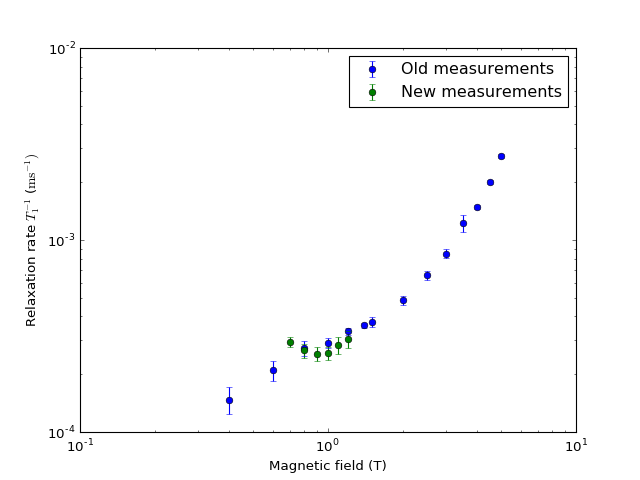

In [41]:
ax = T1_msmt_set_old.plot_T1_rates(label='Old measurements')
T1_msmt_set_new.plot_T1_rates(ax=ax, label='New measurements')